### <span style='color:#40E0D0'> Objetivo:

Resolução de um problema de Regressão. Buscando aprender mais acerca de problemas de regressão, machine learning, avalidação de métricas, uso de cross validation, criação e comparação de modelos preditivos como uso da biblioteca scikit learn, estive motivado para realização deste projeto.

<hr>

### <span style='color:#40E0D0'> Foco:

Previsão de gastos com planos de saúde, à variar com características do segurado.

<hr>

### <span style='color:#40E0D0'> 1° Vista Dados:

In [37]:
# Importando Bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Configurando para mostrar somente 2 casas decimais
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [39]:
# Lendo os dados 
df_seguro = pd.read_csv('./insurance/insurance.csv')

df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


Esclarecendo algumas features...

- bmi -> índice de massa corpórea
- charges -> Valor pago anualmente

In [40]:
# Quantidade de linhas e colunas
print(f'Temos: {df_seguro.shape[0]} linhas')
print(f'Temos: {df_seguro.shape[1]} colunas')

Temos: 1338 linhas
Temos: 7 colunas


In [41]:
# Conhecendo seus tipos
df_seguro.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [42]:
# Checando informação do df
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [77]:
# Reafirmando que não há valores nulos
df_seguro.isnull().sum()

age          0
bmi          0
children     0
charges      0
mulher       0
fumante      0
northwest    0
southeast    0
southwest    0
dtype: int64

Não temos dados faltantes

In [43]:
# Se há valores duplicados
print(f'Temos: {df_seguro.duplicated().sum()} linha(s) duplicada(s)')

df_seguro.loc[df_seguro.duplicated() == 1]

Temos: 1 linha(s) duplicada(s)


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.56


In [44]:
df_seguro.loc[df_seguro['bmi'] == 30.59]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.56
423,25,male,30.59,0,no,northeast,2727.40
526,19,female,30.59,2,no,northwest,24059.68
567,41,male,30.59,2,no,northwest,7256.72
581,19,male,30.59,0,no,northwest,1639.56
983,27,female,30.59,1,no,northeast,16796.41
1158,20,female,30.59,0,no,northeast,2459.72


Provavelmente a aparição de uma linha duplicada, neste caso, pode estar relacionada ao acaso

### <span style='color:#40E0D0'> Análise Estatistica - Conhecendo os dados

In [45]:
# Conhecendo um pouco mais dos dados
df_seguro.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


<span style='color:#40E0D0'> Idades:

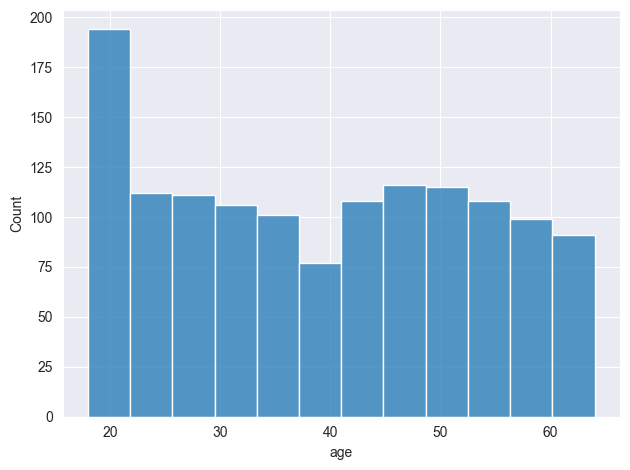

In [46]:
# Visualizando a distribuição das idades
sns.set_style('darkgrid')

sns.histplot(data= df_seguro, x= 'age')
plt.tight_layout()

plt.show()

<span style='color:#40E0D0'> Quantidade de filhos:

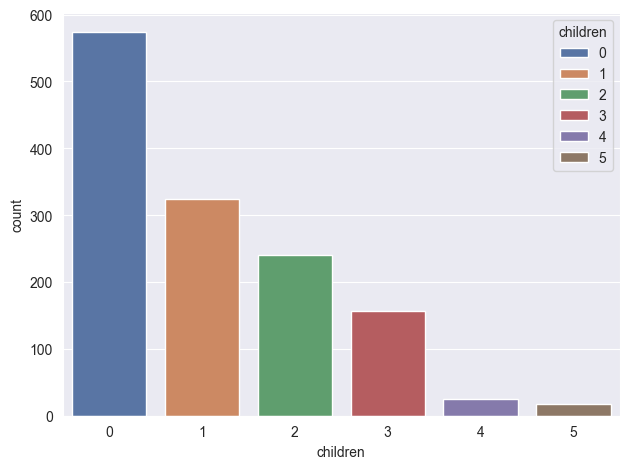

In [47]:
# Verificando a quantidade de filhos
sns.set_style('darkgrid')

# Preferível countplot, pois a dispersão está próxima a média, há menos opções
sns.countplot(data= df_seguro, x= 'children', hue= 'children', palette= 'deep')
plt.tight_layout()

plt.show()

<span style='color:#40E0D0'> Índice de Massa Corpórea:

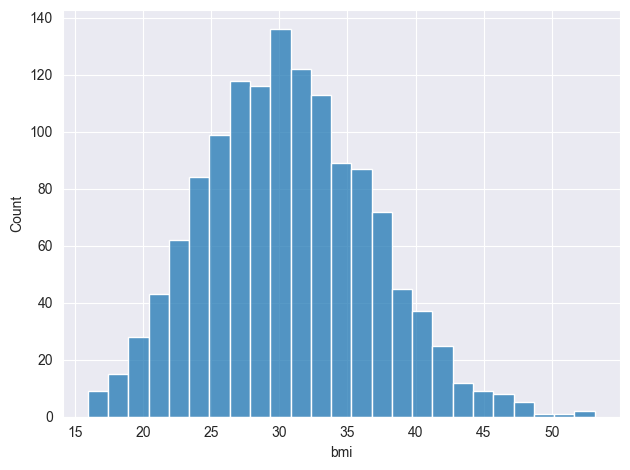

In [48]:
# Verificando a BMI
sns.set_style('darkgrid')

sns.histplot(data= df_seguro, x= 'bmi')
plt.tight_layout()

plt.show()

Conhecendo um pouco sobre o índice

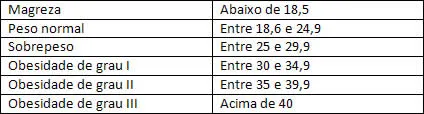

<span style='color:#40E0D0'> Segurados por Região:

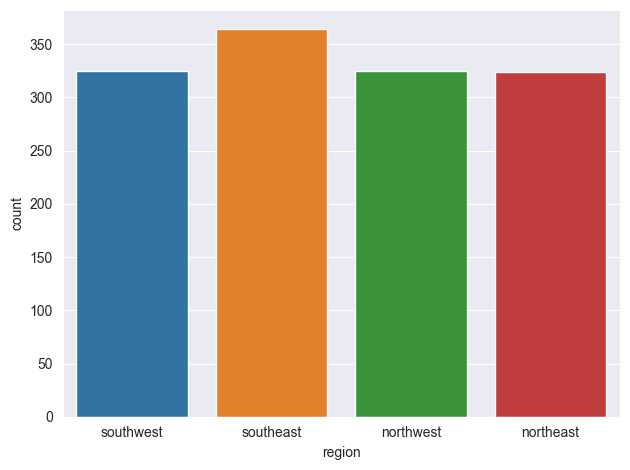

In [49]:
# Verificando a distribuição de segurados por região
sns.set_style('darkgrid')

sns.countplot(data= df_seguro, x= 'region', hue= 'region')
plt.tight_layout()

plt.show()

<span style='color:#40E0D0'> Segurados por sexo:

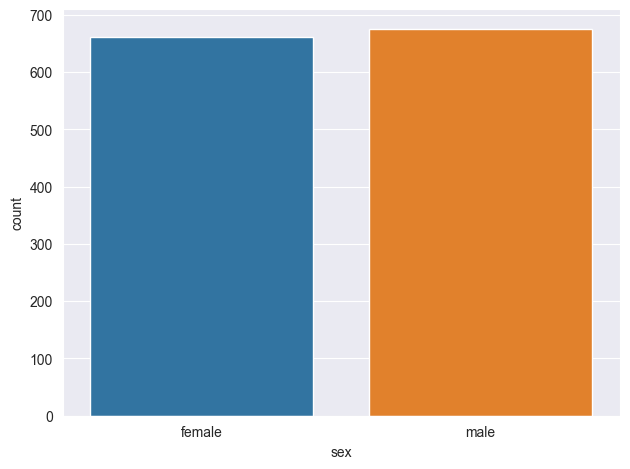

In [50]:
# Verificando a distribuição de segurados por sexo
sns.set_style('darkgrid')

sns.countplot(data= df_seguro, x= 'sex', hue= 'sex', legend= False)
plt.tight_layout()

plt.show()

<span style='color:#40E0D0'> Se os segurados fumam:

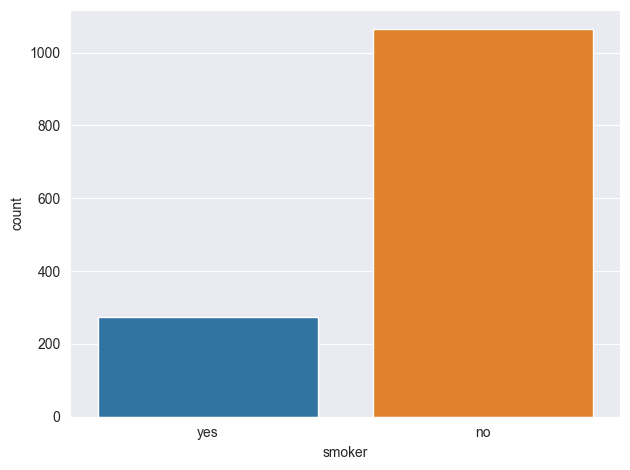

In [51]:
# Verificando candidatos que fumam
sns.set_style('darkgrid')

sns.countplot(data= df_seguro, x= 'smoker', hue= 'smoker', legend= False)
plt.tight_layout()

plt.show()

<span style='color:#40E0D0'> Conhecendo nossa variável dependente: **Charges**

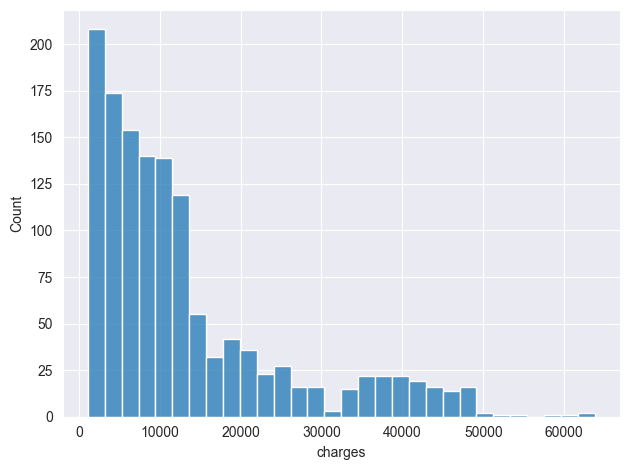

In [52]:
# Verificando preços
sns.set_style('darkgrid')

sns.histplot(data= df_seguro, x= 'charges')
plt.tight_layout()

plt.show()

<span style='color:#40E0D0'> Reconhecendo Relação com a Variável Target:

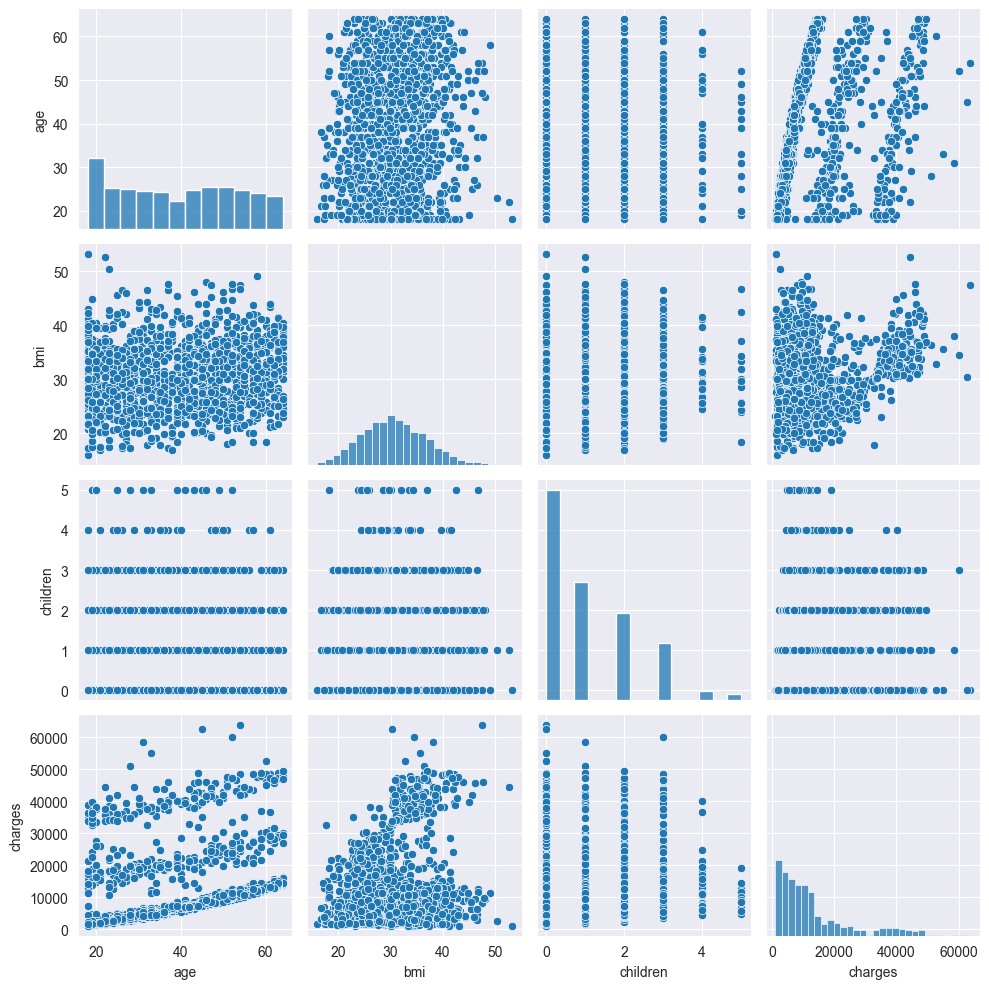

In [53]:
# Scatterplots e Histplots. Vamos manter o foco na linha da variável dependente e visualizar se há relações.
sns.pairplot(data= df_seguro)
plt.tight_layout()

plt.show()

Olhando pela linha de charges:

- Em idade podemos ver uma correlação positiva, ao aumentear a idade, há um aumento do valor cobrado.
- Outras features não haja visto uma correlação clara

### <span style='color:#40E0D0'> Transformação de variáveis categóricas

Neste caso, teremos variáveis somente nominais, como visto:

In [54]:
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [55]:
df_seguro['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [56]:
# Modificando coluna sexo para valor númérico, sendo 1 é mulher, sendo 0 é homem
df_seguro['mulher'] = df_seguro['sex'].map({'female': 1, 'male': 0})

# Modificando coluna fumantes, sendo 1 quem fuma e 0 quem não fuma
df_seguro['fumante'] = df_seguro['smoker'].map({'yes': 1, 'no':0})

# Modificando region
regioes = pd.get_dummies(df_seguro['region'], drop_first= True)
pd.concat([df_seguro, regioes], axis=1).head()


,age,sex,bmi,children,smoker,region,charges,mulher,fumante,northwest,southeast,southwest
0,19,female,27.90,0,yes,southwest,16884.92,1,1,False,False,True
1,18,male,33.77,1,no,southeast,1725.55,0,0,False,True,False
2,28,male,33.00,3,no,southeast,4449.46,0,0,False,True,False
3,33,male,22.70,0,no,northwest,21984.47,0,0,True,False,False
4,32,male,28.88,0,no,northwest,3866.86,0,0,True,False,False


In [57]:
df_seguro = pd.concat([df_seguro, regioes], axis=1)
df_seguro = df_seguro.drop('region', axis=1)

df_seguro.head()

,age,sex,bmi,children,smoker,charges,mulher,fumante,northwest,southeast,southwest
0,19,female,27.90,0,yes,16884.92,1,1,False,False,True
1,18,male,33.77,1,no,1725.55,0,0,False,True,False
2,28,male,33.00,3,no,4449.46,0,0,False,True,False
3,33,male,22.70,0,no,21984.47,0,0,True,False,False
4,32,male,28.88,0,no,3866.86,0,0,True,False,False


In [60]:
# Dropando as colunas remanescentes
df_seguro.drop(['sex', 'smoker'], axis=1).head()

,age,bmi,children,charges,mulher,fumante,northwest,southeast,southwest
0,19,27.90,0,16884.92,1,1,False,False,True
1,18,33.77,1,1725.55,0,0,False,True,False
2,28,33.00,3,4449.46,0,0,False,True,False
3,33,22.70,0,21984.47,0,0,True,False,False
4,32,28.88,0,3866.86,0,0,True,False,False


In [61]:
df_seguro = df_seguro.drop(['sex', 'smoker'], axis=1)

df_seguro.head()

,age,bmi,children,charges,mulher,fumante,northwest,southeast,southwest
0,19,27.90,0,16884.92,1,1,False,False,True
1,18,33.77,1,1725.55,0,0,False,True,False
2,28,33.00,3,4449.46,0,0,False,True,False
3,33,22.70,0,21984.47,0,0,True,False,False
4,32,28.88,0,3866.86,0,0,True,False,False


### <span style='color:#40E0D0'> Variáveis Preditoras e Variável Target

- X = variáveis preditoras
- y = variável target

In [62]:
df_seguro.columns

Index(['age', 'bmi', 'children', 'charges', 'mulher', 'fumante', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

Variáveis preditoras

In [65]:
X = df_seguro[['age', 'mulher', 'bmi', 'children', 'fumante', 'northwest',
       'southeast', 'southwest']]
X.head()

,age,mulher,bmi,children,fumante,northwest,southeast,southwest
0,19,1,27.90,0,1,False,False,True
1,18,0,33.77,1,0,False,True,False
2,28,0,33.00,3,0,False,True,False
3,33,0,22.70,0,0,True,False,False
4,32,0,28.88,0,0,True,False,False


Variável target

In [ ]:
y = df_seguro['charges']

y

0      16884.92
1       1725.55
2       4449.46
3      21984.47
4       3866.86
         ...   
1333   10600.55
1334    2205.98
1335    1629.83
1336    2007.94
1337   29141.36
Name: charges, Length: 1338, dtype: float64

Verificando Correlação entre as variáveis, principalmente as preditoras. 

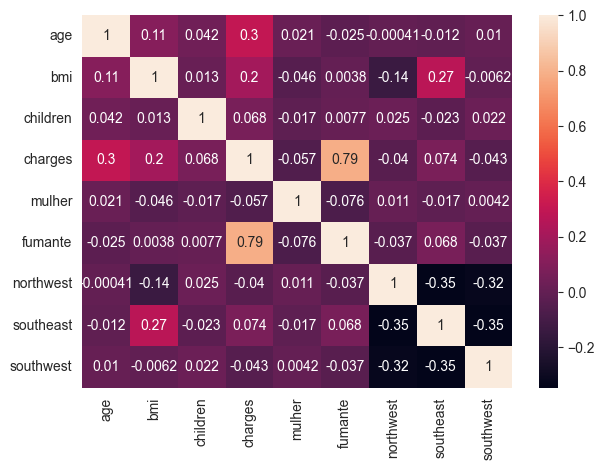

In [76]:
corr = df_seguro.corr()
sns.heatmap(data= corr, annot= True)
plt.tight_layout()

plt.show()

Em modelos lineares não devemos manter colinearidade entre variáveis preditoras, por isso se faz importante o uso do heatmap.

### <span style='color:#40E0D0'> Separação das Bases

Como sabemos, precisamos realizar tal separação (base de treino e de teste) a fim de evitar problemas com o data leakage. Somente após a separação que faremos outras alterações como alterar as escalas numéricas das colunas.

In [66]:
from sklearn.model_selection import train_test_split

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state= 42)

# Conferindo o shape de cada base
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

### <span style='color:#40E0D0'> Escala de colunas numéricas

Sabemos que em modelos lineares a escala é importante para o desempenho do modelo. Por conta disso iremos recorrer ao feature scaling Normalização com o MinMaxScaler e Padronização com o StandartScaler

In [67]:
from sklearn.preprocessing import MinMaxScaler

# Inserindo à variável
escala = MinMaxScaler()

Sabemos que a normalização vamos inserir ao menor valor o 0 e ao maior valor o 1.

In [70]:
colunas = X_train.columns

# fit e transform no treino e SOMENTE transform no teste.
X_train[colunas] = escala.fit_transform(X_train)
X_test[colunas] = escala.transform(X_test)

X_train.shape, X_test.shape

((1070, 8), (268, 8))

In [71]:
# Conferindo o fit_transform
X_train.head()

,age,mulher,bmi,children,fumante,northwest,southeast,southwest
560,0.61,1.00,0.11,0.40,0.00,1.00,0.00,0.00
1285,0.63,1.00,0.22,0.00,0.00,0.00,0.00,0.00
1142,0.74,1.00,0.24,0.00,0.00,0.00,1.00,0.00
969,0.46,1.00,0.49,1.00,0.00,0.00,1.00,0.00
486,0.78,1.00,0.15,0.60,0.00,1.00,0.00,0.00


Podemos visualizar que está correto quando, por exemplo, em 'children' temos valores entre 0 e 1 apenas.

In [73]:
# Checando os min e max
X_train.describe()

,age,mulher,bmi,children,fumante,northwest,southeast,southwest
count,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00,1070.00
mean,0.46,0.49,0.39,0.22,0.21,0.24,0.26,0.25
std,0.31,0.50,0.16,0.24,0.40,0.43,0.44,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.00,0.28,0.00,0.00,0.00,0.00,0.00
50%,0.47,0.00,0.38,0.20,0.00,0.00,0.00,0.00
75%,0.72,1.00,0.50,0.40,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### <span style='color:#40E0D0'> Modelo Regressão Linear:

In [78]:
# Importação de modelo de Regressão Linear e Cross Validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [82]:
# Atribuindo a uma variável
regressao_linear = LinearRegression()

# Treinar o modelo por cross validation | estimator= modelo, cv = fold cross validation, scoring= métrica de desempenho 
valores_rsme_rl  = cross_val_score(estimator= regressao_linear, X= X_train, y= y_train, cv=10, scoring= 'neg_root_mean_squared_error' )

# Olhando os erros em cada split do cross validation
valores_rsme_rl = valores_rsme_rl * -1
valores_rsme_rl

array([6073.99997254, 6580.87166754, 5233.82683473, 6045.25239632,
       5836.4647871 , 6127.43525895, 7281.08373608, 6321.52706355,
       6193.3145481 , 5637.06299714])

Quanto há em média de erro?

In [83]:
valores_rsme_rl.mean()

6133.083926205501

Com Cross validation temos em 10 splits uma média de erro de 6133 dólares pagos anualmente no seguro.

### <span style='color:#40E0D0'> Modelo Árvore de Regressão:

In [84]:
# Trazendo a árvore de regressão
from sklearn.tree import DecisionTreeRegressor

In [86]:
# Atribuindo a uma variável
arvore_regressao = DecisionTreeRegressor()

# Treinar utilizando o Cross Validation com Árvore de regressão
valores_rsme_arvore = cross_val_score(estimator=arvore_regressao, X= X_train, y= y_train, cv= 10, scoring= 'neg_root_mean_squared_error')

valores_rsme_arvore = valores_rsme_arvore * -1
valores_rsme_arvore

array([6020.68993115, 7511.91518926, 7006.38300419, 7335.39962575,
       7274.70207083, 6326.55950461, 7383.39458974, 7244.43492221,
       6481.29842642, 6387.60335328])

Quanto há em média de erro neste modelo?

In [87]:
# Conferindo a média de error da árvore de regressão
valores_rsme_arvore.mean()

6897.238061743068

Podemos visualizar que a média utilizando a Regressão Linear foi menor do que esta utilizando a árvore de regressão

### <span style='color:#40E0D0'> Modelo Regressão Linear - Sem colunas de regiões:

Como sabemos a alteração de feature pode contribuir para melhorar nosso modelo. Como visto no heatmap variáveis preditoras e variável target acima, não há uma correlação forte com a variável target. Vale a pena o teste.

In [88]:
X_train.head()

,age,mulher,bmi,children,fumante,northwest,southeast,southwest
560,0.61,1.00,0.11,0.40,0.00,1.00,0.00,0.00
1285,0.63,1.00,0.22,0.00,0.00,0.00,0.00,0.00
1142,0.74,1.00,0.24,0.00,0.00,0.00,1.00,0.00
969,0.46,1.00,0.49,1.00,0.00,0.00,1.00,0.00
486,0.78,1.00,0.15,0.60,0.00,1.00,0.00,0.00


In [89]:
# Separando as colunas de regiões
colunas_regioes = ['northwest', 'southeast', 'southwest']

# Treino Regressão Linear sem as regiões
valores_rsme_rl_sem_regioes = cross_val_score(estimator= regressao_linear, 
                                              X= X_train.drop(colunas_regioes, axis= 1), 
                                              y= y_train, cv= 10, 
                                              scoring= 'neg_root_mean_squared_error')

valores_rsme_rl_sem_regioes = valores_rsme_rl_sem_regioes * -1
valores_rsme_rl_sem_regioes

array([6047.74861144, 6576.17442833, 5208.18399508, 5969.09583538,
       5870.19697933, 6107.50898187, 7295.03885205, 6309.72867769,
       6178.86188095, 5652.91238386])

In [90]:
valores_rsme_rl_sem_regioes.mean()

6121.545062597131

Este é ainda um melhor pior que o Modelo de regressão acima. Tentaremos com o modelo de árvore de regressão também

### <span style='color:#40E0D0'> Modelo Árvore de Regressão - Sem colunas de regiões:

In [91]:
colunas_regioes

['northwest', 'southeast', 'southwest']

In [108]:
valores_rsme_arvore_sem_regioes = cross_val_score(estimator= arvore_regressao, X= X_train.drop(colunas_regioes, axis= 1), y= y_train, cv= 10, scoring= 'neg_root_mean_squared_error')

valores_rsme_arvore_sem_regioes = valores_rsme_arvore_sem_regioes * -1
valores_rsme_arvore_sem_regioes

array([6646.57304824, 6818.05700118, 6344.14210259, 6685.46354012,
       6898.84592721, 6748.28725123, 7802.40164219, 7293.14667675,
       7085.89339519, 6661.69301881])

In [109]:
valores_rsme_arvore_sem_regioes.mean()

6898.450360349816

Um pouco pior que o modelo de árvore de regressão com as regiões, mas ainda não melhor que o modelo de regressão linear sem regiões

### <span style='color:#40E0D0'> Comparação modelos:

In [110]:
modelos = pd.DataFrame({ 'Regressão ': valores_rsme_rl, 
                        'Regressão  Sem Regiões': valores_rsme_rl_sem_regioes,
                        'Arvore ': valores_rsme_arvore, 
                        'Arvore  Sem Regiões': valores_rsme_arvore_sem_regioes})

modelos

,Regressão,Regressão Sem Regiões,Arvore,Arvore Sem Regiões
0,6074.00,6047.75,6020.69,6646.57
1,6580.87,6576.17,7511.92,6818.06
2,5233.83,5208.18,7006.38,6344.14
3,6045.25,5969.10,7335.40,6685.46
4,5836.46,5870.20,7274.70,6898.85
5,6127.44,6107.51,6326.56,6748.29
6,7281.08,7295.04,7383.39,7802.40
7,6321.53,6309.73,7244.43,7293.15
8,6193.31,6178.86,6481.30,7085.89
9,5637.06,5652.91,6387.60,6661.69


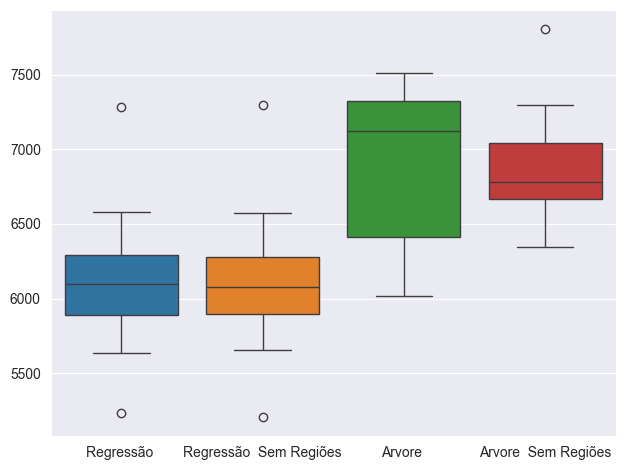

In [111]:
# Visaulização dos dados:
sns.boxplot(data= modelos)
plt.tight_layout()

Vimos que a média em Regressão Sem Regiões foi melhor que a Regressão. Com isso, escolheremos o Modelo de Regressão Linear Sem Regiões

### <span style='color:#40E0D0'> Escolhido o Modelo:

Agora iremos treinar a base de treinamento toda.

Agora vamos usar o FIT na base de treinamento sem as colunas de região

In [112]:
regressao_linear.fit(X_train.drop(colunas_regioes, axis= 1), y= y_train)

LinearRegression()

In [113]:
# Reconhecendo os coeficientes de Regressão Linear Múltiplas
regressao_linear.coef_

array([1.18251723e+04, 7.95178837e+00, 1.21744207e+04, 2.13627215e+03,
       2.36539033e+04])

In [116]:
regressao_linear.feature_names_in_

array(['age', 'mulher', 'bmi', 'children', 'fumante'], dtype=object)

In [115]:
df_seguro.head()

,age,bmi,children,charges,mulher,fumante,northwest,southeast,southwest
0,19,27.90,0,16884.92,1,1,False,False,True
1,18,33.77,1,1725.55,0,0,False,True,False
2,28,33.00,3,4449.46,0,0,False,True,False
3,33,22.70,0,21984.47,0,0,True,False,False
4,32,28.88,0,3866.86,0,0,True,False,False


In [124]:
# Os coeficientes da regressão linear indicam, neste caso, o quanto o valor subirá a cada váriável
data = {'age': 11825.17, 'mulher': 7.95, 'bmi': 12174.42, 'children': 2136.27, 'fumante': 23653.90}
df_coeficientes = pd.DataFrame(data, index=[0])

df_coeficientes


,age,mulher,bmi,children,fumante
0,11825.17,7.95,12174.42,2136.27,23653.90


<span style='color:#40E0D0'> Validação Estatística, nosso P-valor precisando ser menor que 0.05

In [127]:
# Verificando o P valor dos coeficientes da Regressão linear
import statsmodels.api as sm

In [128]:
# Código para cálculo de p-valor
rl_statsmodels = sm.OLS(y_train, X_train.drop(colunas_regioes, axis=1))
resultado_fit = rl_statsmodels.fit()
p_valores =  resultado_fit.summary2().tables[1]['P>|t|']
p_valores

age        0.00
mulher     0.21
bmi        0.00
children   0.07
fumante    0.00
Name: P>|t|, dtype: float64

O p-valor sendor maior que 0.05 não utilizaremos ele como coeficiente, pois ele não é Estetiscamente válido.

Ou seja: Tanto Sexo quanto Quantida de crianças não são estatisticamente válidos. Entretanto,BMI, Fumar e idade são estatisticamente válidos.

<hr>

### <span style='color:#40E0D0'> Finalização

Com nosso modelo escolhido vamos utilizá-lo. Somente agora vamos utilizar o X_test e y_test

<span style='color:#40E0D0'> Estes são as predições feitas do nosso modelo escolhido utilizando nossos valores de X_teste:

In [130]:
# Como foi feito o fit acima com o FIT, vamos verificar os preços preditos
# O predict para predição.
charges_predito = regressao_linear.predict(X=X_test.drop(colunas_regioes, axis=1))
charges_predito[:5]

array([ 8554.81711589,  6973.58746745, 36798.60416104,  9417.88282303,
       26871.68031081])

In [133]:
predicao_x_real = pd.DataFrame({'predicao': charges_predito.flatten(), 'real': y_test.values.flatten()})
predicao_x_real['diferenca_abs'] = abs(predicao_x_real['predicao'] - predicao_x_real['real'])

predicao_x_real

,predicao,real,diferenca_abs
0,8554.82,9095.07,540.25
1,6973.59,5272.18,1701.41
2,36798.60,29330.98,7467.62
3,9417.88,9301.89,115.99
4,26871.68,33750.29,6878.61
...,...,...,...
263,39221.00,47055.53,7834.54
264,11695.63,12222.90,527.26
265,7253.60,6067.13,1186.47
266,40950.54,63770.43,22819.89


<span style='color:#40E0D0'> Verificando o desempenho do nosso modelo com o R Squared:

In [134]:
from sklearn.metrics import r2_score

r2_score(y_true= y_test, y_pred=charges_predito)

0.7811302113434095

Quanto mais próximo de 1, melhor será nosso modelo. 0.78 está válido.

### <span style='color:#40E0D0'> Conclusões:

Por fim, pudemos visualizar predições de valores de preços pagos em seguros de saúde por 1 ano, através de modelos de machine learning, mas com toda uma base em exploração e reconhecimento dos dados. Além disso, com apoio estatístico pode ser visto features que não estariam válidas estatisticamente através do teste do p-valor. Para mais, pode ser visto a melhora do modelo com o uso breve de engenharia de feature com a remoção das regiões, uma vez que não apresentavam colinearidade significativa para o valor a ser pago anualmente.